In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
from google.colab.patches import cv2_imshow

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4534  100  4534    0     0  65710      0 --:--:-- --:--:-- --:--:-- 65710


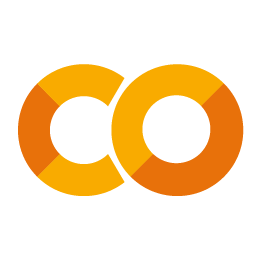

In [ ]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings(action='ignore') 

In [ ]:
file_path = "/content/block3.csv"
bitcoin_df = pd.read_csv(file_path, names = ['day', 'price'])
bitcoin_df

,day,price
0,2020-12-09,18318.87
1,2020-12-10,18554.15
2,2020-12-11,18247.76
3,2020-12-12,18029.36
4,2020-12-13,18803.44
...,...,...
361,2021-12-05,49253.86
362,2021-12-06,49380.43
363,2021-12-07,50564.63
364,2021-12-08,50645.41


In [ ]:
# 5일치 예측
bitcoin_train_df = bitcoin_df.iloc[:361]
bitcoin_train_df

,day,price
0,2020-12-09,18318.87
1,2020-12-10,18554.15
2,2020-12-11,18247.76
3,2020-12-12,18029.36
4,2020-12-13,18803.44
...,...,...
356,2021-11-30,57828.45
357,2021-12-01,57025.79
358,2021-12-02,57229.76
359,2021-12-03,56508.48


In [ ]:
bitcoin_train_df.shape

(361, 2)

In [ ]:
bitcoin_train_df.info()
# 날짜 dtype: object를 날짜 dtype으로 변경 필요

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     361 non-null    object 
 1   price   361 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [ ]:
# 날짜: object => datetime
bitcoin_train_df['day'] = pd.to_datetime(bitcoin_train_df['day'])
bitcoin_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   day     361 non-null    datetime64[ns]
 1   price   361 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
bitcoin_train_df.set_index('day', inplace=True) # inplace=True로 반영(파괴함수)

In [ ]:
bitcoin_train_df

,price
day,
2020-12-09,18318.87
2020-12-10,18554.15
2020-12-11,18247.76
2020-12-12,18029.36
2020-12-13,18803.44
...,...
2021-11-30,57828.45
2021-12-01,57025.79
2021-12-02,57229.76


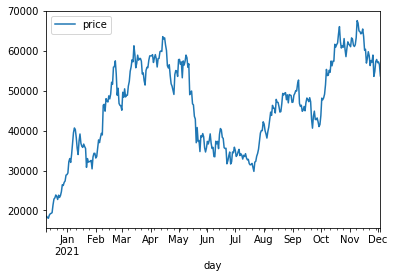

In [ ]:
bitcoin_train_df.plot()

In [ ]:
### ARIMA모델 = AR + I + MA
### AR: AutoRegression, 이전 데이터들에서 학습한 내용을 가지고 예측
### MA: MovingAverage, 이전 데이터들의 오차를 반영해서 예측(오차 최소화)
### I: Intrepolation(Difference), 보간(차이)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [ ]:
model = ARIMA(bitcoin_train_df.values, order=(2, 1, 2)) # order=(AR, I, MA) - "hyper parameters"
# 2(AR), 1(I, 거의 1로 고정), 2(MA): (AR, MA) 이전 데이터들/오차를 어디까지 줘야할지 설정 => 크면 오버피팅, 작으면 언더피팅
model

In [ ]:
model_fit = model.fit(trend='c', full_output=True, disp=True) # trend='c': 트렌드 일정(constant)
model_fit

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  360
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3225.913
Method:                       css-mle   S.D. of innovations           1882.730
Date:                Fri, 10 Dec 2021   AIC                           6463.825
Time:                        01:38:10   BIC                           6487.142
Sample:                             1   HQIC                          6473.096
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.7901     99.496      0.802      0.423    -115.219     274.799
ar.L1.D.y      0.9185      0.040     23.091      0.000       0.841       0.996
ar.L2.D.y     -0.9440      0.032    -29.400      0.000      -1.007      -0.881
ma.L1.D.y     -0.9573      0.025    -38.376      0.000      -1.006      -0.908
ma.L2.D.y      0.9855      0.026     38.263      0.000       0.935       1.036
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.4865           -0.9070j            1.0292           -0.1716
AR.2            0.4865           +0.9070j            1.0292            0.1716
MA.1            0.4857           -0.8825j            1.0073           -0.1699
MA.2            0.4857           +0.8825j            1.0073            0.1699
-----------------------------------------------------------------------------
"""

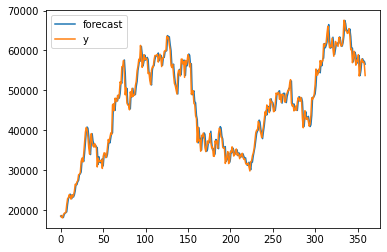

In [ ]:
fig = model_fit.plot_predict()

In [ ]:
forecast_data = model_fit.forecast(steps=5)
forecast_data

(array([53859.90839342, 53891.33862905, 53864.14563435, 53891.32506776,
        54023.78371803]),
 array([1882.73041766, 2611.43093677, 3183.52110652, 3707.37515166,
        4194.6159268 ]),
 array([[50169.8245822 , 57549.99220464],
        [48773.02804487, 59009.64921322],
        [47624.55892156, 60103.73234715],
        [46625.00329334, 61157.64684219],
        [45802.48757252, 62245.07986355]]))

In [ ]:
bitcoin_test_df = bitcoin_df[361:]
bitcoin_test_df

,day,price
361,2021-12-05,49253.86
362,2021-12-06,49380.43
363,2021-12-07,50564.63
364,2021-12-08,50645.41
365,2021-12-09,50511.12


In [ ]:
pred_y = forecast_data[0]
pred_y

array([53859.90839342, 53891.33862905, 53864.14563435, 53891.32506776,
       54023.78371803])

In [ ]:
pred_y = pred_y.tolist()
pred_y

[53859.90839341877,
 53891.33862904949,
 53864.14563435281,
 53891.32506776393,
 54023.78371803221]

In [ ]:
bitcoin_test_df.price

361    49253.86
362    49380.43
363    50564.63
364    50645.41
365    50511.12
Name: price, dtype: float64

In [ ]:
bitcoin_test_df.values

array([['2021-12-05', 49253.86],
       ['2021-12-06', 49380.43],
       ['2021-12-07', 50564.63],
       ['2021-12-08', 50645.41],
       ['2021-12-09', 50511.12]], dtype=object)

In [ ]:
test_y = bitcoin_test_df.price.values
test_y

array([49253.86, 49380.43, 50564.63, 50645.41, 50511.12])

In [ ]:
test_y = test_y.tolist()
test_y

[49253.86, 49380.43, 50564.63, 50645.41, 50511.12]

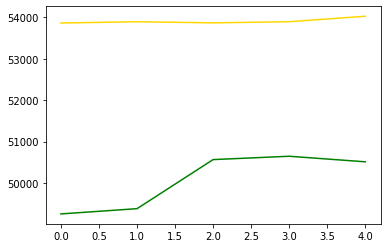

In [ ]:
plt.plot(pred_y, color='gold')
plt.plot(test_y, color='green')

In [ ]:
forecast_data[2]
# 1. 최저[0], 최고[1] => 그래프로!
# 2. dataset의 양을 3년 이상으로!

array([[50169.8245822 , 57549.99220464],
       [48773.02804487, 59009.64921322],
       [47624.55892156, 60103.73234715],
       [46625.00329334, 61157.64684219],
       [45802.48757252, 62245.07986355]])

In [ ]:
highest = forecast_data[2][:,1].tolist()
lowest = forecast_data[2][:,0].tolist()
highest, lowest

([57549.99220463973,
  59009.64921322421,
  60103.73234714941,
  61157.64684218763,
  62245.0798635478],
 [50169.82458219781,
  48773.028044874765,
  47624.558921556214,
  46625.00329334023,
  45802.48757251662])

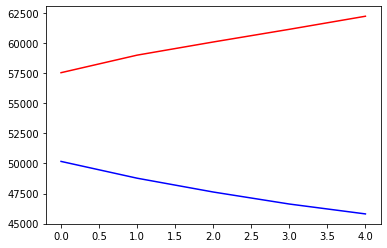

In [ ]:
plt.plot(highest, color='red')
plt.plot(lowest, color='blue')
plt.show()

In [ ]:
### Additive모델 = ARIMA + 기간의 trend(경향성): made by facebook(fb)

In [45]:
from fbprophet import Prophet

In [46]:
bitcoin_df2 = pd.read_csv(file_path, names=['ds','y'])
bitcoin_df2

,ds,y
0,2020-12-09,18318.87
1,2020-12-10,18554.15
2,2020-12-11,18247.76
3,2020-12-12,18029.36
4,2020-12-13,18803.44
...,...,...
361,2021-12-05,49253.86
362,2021-12-06,49380.43
363,2021-12-07,50564.63
364,2021-12-08,50645.41


In [47]:
prophet = Prophet(seasonality_mode='multiplicative',
                  yearly_seasonality=True,
                  weekly_seasonality=True,
                  daily_seasonality=True,
                  changepoint_prior_scale=0.5)

prophet.fit(bitcoin_df2)

In [48]:
future_data = prophet.make_future_dataframe(periods=5,freq='d')
forecast_data = prophet.predict(future_data)
forecast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2020-12-09,2224.520601,16192.237949,20436.461517,2224.520601,2224.520601,10.589405,10.589405,10.589405,7.270101,7.270101,7.270101,-0.042453,-0.042453,-0.042453,-3.276850,-3.276850,-3.276850,0.0,0.0,0.0,18397.010913
1,2020-12-10,2245.025866,16339.997893,20786.966078,2245.025866,2245.025866,10.589405,10.589405,10.589405,7.273211,7.273211,7.273211,0.017467,0.017467,0.017467,-3.333660,-3.333660,-3.333660,0.0,0.0,0.0,18573.573214
2,2020-12-11,2265.531130,16287.111674,20727.357449,2265.531130,2265.531130,10.589405,10.589405,10.589405,7.177258,7.177258,7.177258,-0.044290,-0.044290,-0.044290,-3.367857,-3.367857,-3.367857,0.0,0.0,0.0,18525.832046
3,2020-12-12,2286.036394,16584.004788,20979.133930,2286.036394,2286.036394,10.589405,10.589405,10.589405,7.232412,7.232412,7.232412,0.021332,0.021332,0.021332,-3.378325,-3.378325,-3.378325,0.0,0.0,0.0,18819.592860
4,2020-12-13,2306.541659,16779.113499,21154.475211,2306.541659,2306.541659,10.589405,10.589405,10.589405,7.243287,7.243287,7.243287,0.018141,0.018141,0.018141,-3.364259,-3.364259,-3.364259,0.0,0.0,0.0,19013.485085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,2021-12-10,6142.437574,48370.978975,52925.333961,6142.437574,6142.437574,10.589405,10.589405,10.589405,7.223587,7.223587,7.223587,-0.044290,-0.044290,-0.044290,-3.321528,-3.321528,-3.321528,0.0,0.0,0.0,50512.869646
367,2021-12-11,6183.302817,48651.337644,53310.883636,6183.302817,6183.302817,10.589405,10.589405,10.589405,7.249243,7.249243,7.249243,0.021332,0.021332,0.021332,-3.361494,-3.361494,-3.361494,0.0,0.0,0.0,51007.566222
368,2021-12-12,6224.168061,48771.637773,53619.207875,6219.666758,6226.880114,10.589405,10.589405,10.589405,7.229564,7.229564,7.229564,0.018141,0.018141,0.018141,-3.377982,-3.377982,-3.377982,0.0,0.0,0.0,51222.189345
369,2021-12-13,6265.033305,48937.170302,54044.276224,6222.382408,6292.214166,10.589405,10.589405,10.589405,7.229249,7.229249,7.229249,0.009951,0.009951,0.009951,-3.370107,-3.370107,-3.370107,0.0,0.0,0.0,51556.521793


In [49]:
forecast_data[['ds','yhat','yhat_lower','yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
366,2021-12-10,50512.869646,48370.978975,52925.333961
367,2021-12-11,51007.566222,48651.337644,53310.883636
368,2021-12-12,51222.189345,48771.637773,53619.207875
369,2021-12-13,51556.521793,48937.170302,54044.276224
370,2021-12-14,52161.984803,49440.185451,54693.825120


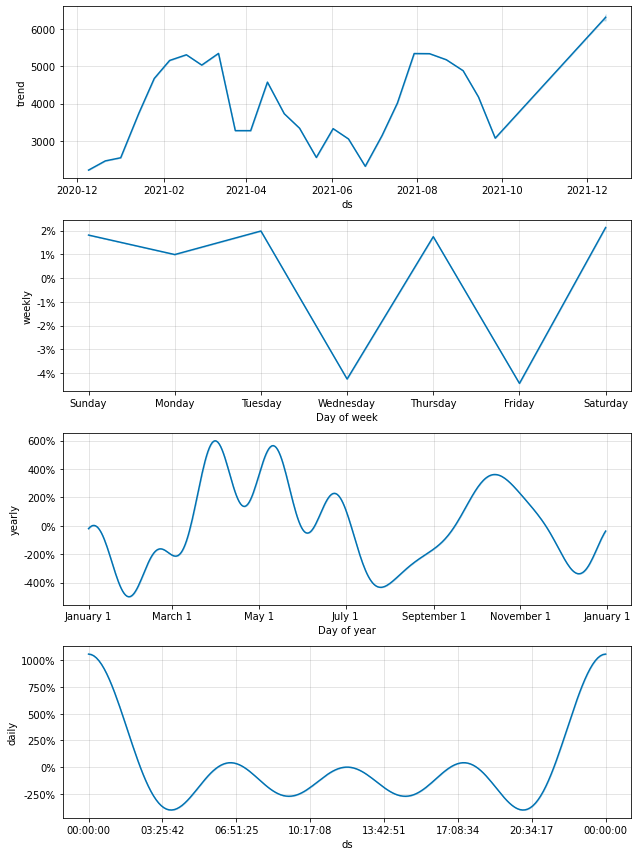

In [50]:
fig2 = prophet.plot_components(forecast_data)